In [ ]:
#%pip install torch
#%pip install torchvision
#%pip install tensorflow



In [72]:
###FINAL
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
from keras import layers
import pandas as pd
import numpy as np

##Carga de data set
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 
  
# Convertir las features y targets en DataFrames
df_features = pd.DataFrame(data=X)
df_targets = pd.DataFrame(data=y)

# Concatenar las features y targets en un solo DataFrame
df_combined = pd.concat([df_features, df_targets], axis=1)

# Mostrar los primeros registros del DataFrame combinado
print("\nPrimeros registros del DataFrame combinado:")
print(df_combined.head())
print(df_combined.dtypes)
print(df_combined.info())





Primeros registros del DataFrame combinado:
     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  30-39   premeno      30-34       0-2        no          3   left   
1  40-49   premeno      20-24       0-2        no          2  right   
2  40-49   premeno      20-24       0-2        no          2   left   
3  60-69      ge40      15-19       0-2        no          2  right   
4  40-49   premeno        0-4       0-2        no          2  right   

  breast-quad irradiat                 Class  
0    left_low       no  no-recurrence-events  
1    right_up       no  no-recurrence-events  
2    left_low       no  no-recurrence-events  
3     left_up       no  no-recurrence-events  
4   right_low       no  no-recurrence-events  
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
Class          object
dtype: object
<class 'pand

In [73]:
##Preprocesado 

#formato_uniforme = all(df_combined[col].apply(type).nunique() == 1 for col in df_combined.columns)

#Compruebo nulos
print(df_combined.isnull().sum())

df_combined = df_combined.drop("Class", axis = 1)
#Sustituyo por NaN
df_combined['tumor-size'] = df_combined['tumor-size'].apply(lambda valor: valor if (len(valor.split('-')) == 2 and valor.split('-')[0].isdigit() and valor.split('-')[1].isdigit()) else np.nan)
df_combined['inv-nodes'] = df_combined['inv-nodes'].apply(lambda valor: valor if (len(valor.split('-')) == 2 and valor.split('-')[0].isdigit() and valor.split('-')[1].isdigit()) else np.nan)

## Selecciono columnas categoricas
categorical_columns = df_combined.select_dtypes(include=['category']).columns
print(categorical_columns)

df_combined = df_combined.apply(lambda x: x.astype('object') if x.dtype.name == 'category' else x, axis=0)
df_combined = df_combined.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x, axis=0)

## Selecciono columnas no categoricas
categorical_columns = df_combined.select_dtypes(include=['object']).columns
df_combined[categorical_columns] = df_combined[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))
print(categorical_columns)

# Transformar columnas con formato de rango a valores numéricos representativos
df_combined['age'] = df_combined['age'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if '-' in x else int(x))
df_combined['tumor-size'] = df_combined['tumor-size'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if '-' in x else int(x))
df_combined['inv-nodes'] = df_combined['inv-nodes'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if '-' in x else int(x))

#formato_uniforme = all(df_combined[col].apply(type).nunique() == 1 for col in df_combined.columns)

##Resumen
print(df_combined.isnull().sum())
print(df_combined.head()) 



age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64
Index([], dtype='object')
Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast',
       'breast-quad', 'irradiat'],
      dtype='object')
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64
   age menopause  tumor-size  inv-nodes node-caps  deg-malig breast  \
0   34   premeno          32          1        no          3   left   
1   44   premeno          22          1        no          2  right   
2   44   premeno          22          1        no          2   left   
3   64      ge40          17          1        no          2  right   
4   44   premeno           2          1        no          2  right   

  breast-quad irradiat  
0    left_low       no  
1    right_up 

In [74]:
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Visualizar las primeras filas del DataFrame
print("Antes del preprocesamiento:")
print(df_combined.head())

# Conversión de variables categóricas a numéricas utilizando Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['node-caps', 'breast', 'irradiat', 'menopause', 'breast-quad']

for column in categorical_columns:
    df_combined[column] = label_encoder.fit_transform(df_combined[column])

print("Conversion Categoricas:")
print(df_combined.head())

# Normalización de variables numéricas entre 0 y 1
numeric_columns = df_combined.columns
#scaler = StandardScaler()
scaler = MinMaxScaler()
df_combined[numeric_columns] = scaler.fit_transform(df_combined[numeric_columns])

# Visualizar las primeras filas del DataFrame después del preprocesamiento
print("\nDespués del preprocesamiento:")
print(df_combined.head())

# División del dataset en entrenamiento y validación
X_train, X_val = train_test_split(df_combined, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)

# Visualizar las dimensiones de los conjuntos de entrenamiento y validación
print("\nDimensiones de los conjuntos de entrenamiento y validación:")
print("Entrenamiento:", X_train.shape)
print("Validación:", X_val.shape)


Antes del preprocesamiento:
   age menopause  tumor-size  inv-nodes node-caps  deg-malig breast  \
0   34   premeno          32          1        no          3   left   
1   44   premeno          22          1        no          2  right   
2   44   premeno          22          1        no          2   left   
3   64      ge40          17          1        no          2  right   
4   44   premeno           2          1        no          2  right   

  breast-quad irradiat  
0    left_low       no  
1    right_up       no  
2    left_low       no  
3     left_up       no  
4   right_low       no  
Conversion Categoricas:
   age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0   34          2          32          1          0          3       0   
1   44          2          22          1          0          2       1   
2   44          2          22          1          0          2       0   
3   64          0          17          1          0          2       1   
4

In [75]:
import torch

# Función para generar muestras a partir del espacio latente
def sample_from_latent_space(model, num_samples):
    model.eval()  # Modo evaluación

    with torch.no_grad():
        # Generar muestras aleatorias en el espacio latente
        latent_samples = torch.randn(num_samples, model.decoder[0].in_features)

        # Decodificar muestras
        generated_data = model.decoder(latent_samples)

    return generated_data

# Ejemplo de uso
num_generated_samples = 100
generated_samples = sample_from_latent_space(vae, num_generated_samples)

# Puedes utilizar los datos generados según sea necesario
print("Ejemplo de datos generados:")
print(generated_samples)


Ejemplo de datos generados:
tensor([[0.5149, 0.5502, 0.4883, 0.0221, 0.1996, 0.5854, 0.4760, 0.4575, 0.2272],
        [0.5075, 0.5550, 0.5793, 0.0423, 0.2203, 0.5077, 0.4322, 0.4492, 0.2499],
        [0.5210, 0.4778, 0.5419, 0.0302, 0.2274, 0.5467, 0.3391, 0.4628, 0.1868],
        [0.5631, 0.4774, 0.5925, 0.0333, 0.2403, 0.5456, 0.3943, 0.4827, 0.2020],
        [0.4969, 0.5924, 0.4848, 0.0272, 0.2122, 0.5356, 0.4987, 0.4172, 0.2608],
        [0.5327, 0.4427, 0.6052, 0.0357, 0.1862, 0.5629, 0.4931, 0.4731, 0.1835],
        [0.5449, 0.5347, 0.5348, 0.0272, 0.2236, 0.5536, 0.4495, 0.4411, 0.2327],
        [0.5090, 0.5122, 0.5372, 0.0412, 0.2160, 0.5441, 0.4949, 0.4231, 0.2942],
        [0.5173, 0.4931, 0.5488, 0.0274, 0.2231, 0.5146, 0.4454, 0.5089, 0.1986],
        [0.5261, 0.5086, 0.5563, 0.0156, 0.1997, 0.4938, 0.4741, 0.4667, 0.1837],
        [0.5546, 0.5200, 0.5608, 0.0192, 0.1708, 0.5338, 0.4023, 0.4543, 0.1856],
        [0.4819, 0.4949, 0.5449, 0.0411, 0.2211, 0.5510, 0.4687, 0.442

In [ ]:
import torch
import torch.nn.functional as F

class Sampling(torch.nn.Module):
    def __init__(self):
        super(Sampling, self).__init__()

    def forward(self, z_mean, z_log_var):
        batch, dim = z_mean.size()

        # Uso de torch.randn directamente en la operación de muestreo
        epsilon = torch.randn(batch, dim, device=z_mean.device, dtype=z_mean.dtype)

        # Devolver la muestra estocástica utilizando la fórmula de reparametrización
        return z_mean + torch.exp(0.5 * z_log_var) * epsilon


In [40]:
## Sampler Modificado
import tensorflow as tf
from tensorflow.keras import layers

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def __init__(self, random_seed=None, **kwargs):
        super(Sampling, self).__init__(**kwargs)
        self.random_seed = random_seed

    def call(self, inputs):
        z_mean, z_log_var = inputs

        # Validación de dimensiones
        assert tf.keras.backend.int_shape(z_mean) == tf.keras.backend.int_shape(z_log_var), \
            "Shapes of z_mean and z_log_var must be the same"

        batch, dim = tf.shape(z_mean)[0], tf.shape(z_mean)[1]

        # Manejo de semilla aleatoria
        if self.random_seed is not None:
            tf.random.set_seed(self.random_seed)

        # Uso de tf.random.normal directamente en la operación de muestreo
        epsilon = tf.random.normal(shape=(batch, dim), dtype=z_mean.dtype)

        # Devolver la muestra estocástica utilizando la fórmula de reparametrización
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


In [55]:
import torch
import torch.nn as nn

# Parámetros
input_size = 9
latent_size = 4  # Tamaño del espacio latente

# Definir el encoder
class Encoder(nn.Module):
    def __init__(self, input_size, latent_size):
        super(Encoder, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5),
            nn.Linear(64, latent_size*2)  # Salida con el doble de dimensiones para la media y la varianza
        )

    def forward(self, x):
        return self.model(x)

# Instanciar el encoder
encoder = Encoder(input_size, latent_size)

# Imprimir la arquitectura del encoder
print(encoder)


Encoder(
  (model): Sequential(
    (0): Linear(in_features=9, out_features=256, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [41]:
## Encoder Modificado

from tensorflow import keras
from tensorflow.keras import layers

latent_dim = 5  

# Encoder para datos numéricos 
encoder_inputs = keras.Input(shape=(9,))  

# Capas densas con activación relu, batch normalization y regularización
x = layers.Dense(256, activation="relu")(encoder_inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)  # Regularización dropout para prevenir el overfitting
x = layers.Dense(128, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Capas adicionales para aumentar la complejidad
#x = layers.Dense(32, activation="relu")(x)
#x = layers.BatchNormalization()(x)
#x = layers.Dropout(0.5)(x)

# Capas para calcular la media y el logaritmo de la varianza
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Capa de muestreo
z = Sampling()([z_mean, z_log_var])

# Crear el modelo del encoder
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 9)]                  0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 256)                  2560      ['input_6[0][0]']             
                                                                                                  
 batch_normalization_15 (Ba  (None, 256)                  1024      ['dense_18[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 dropout_6 (Dropout)         (None, 256)                  0         ['batch_normalization_15

In [58]:
import torch.nn as nn

class Decoder(nn.Module):
    def __init__(self, latent_size, output_size):
        super(Decoder, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, output_size),
            nn.Sigmoid()  # Función de activación sigmoid para asegurar que la salida esté en [0, 1]
        )

    def forward(self, x):
        return self.model(x)

# Ejemplo de uso
output_size = 9  # Tamaño del conjunto de características de salida
decoder = Decoder(latent_size, output_size)

# Crear un tensor de entrada aleatorio para probar el decoder
#latent_tensor = torch.randn(1, latent_size)
#output_tensor = decoder(latent_tensor)

# Imprimir la arquitectura del decoder y la salida para verificar
print(decoder)
print("Output Tensor:")
#print(output_tensor)


Decoder(
  (model): Sequential(
    (0): Linear(in_features=5, out_features=64, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=64, out_features=128, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=128, out_features=256, bias=True)
    (7): ReLU()
    (8): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=256, out_features=9, bias=True)
    (10): Sigmoid()
  )
)
Output Tensor:


In [45]:
##Modificado

from tensorflow.keras import layers

# Define the decoder for numerical data
def decoder(latent_dim, num_features):
    # Input layer for the latent space
    latent_inputs = layers.Input(shape=(10,))

    # Dense layers for non-linear transformations
    x = layers.Dense(256, activation="relu")(latent_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.BatchNormalization()(x)

    # Dense layer for the final reconstruction
    ##MODIFICAR
    decoder_outputs = layers.Dense(num_features, activation="sigmoid")(x)

    ##Modificacion dato activacion
    

    # Create the decoder model
    decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
    
    return decoder

# Build the complex numeric decoder
decoder = decoder(latent_dim, num_features)
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 10)]              0         
                                                                 
 dense_33 (Dense)            (None, 256)               2816      
                                                                 
 batch_normalization_27 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_28 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_35 (Dense)            (None, 64)                8256

Epoch 1/150, Loss: 88.6239, Reconstruction Loss: 0.9213, KL Loss: 87.7026
Epoch 2/150, Loss: 76.6940, Reconstruction Loss: 0.9221, KL Loss: 75.7719
Epoch 3/150, Loss: 70.2997, Reconstruction Loss: 0.6764, KL Loss: 69.6233
Epoch 4/150, Loss: 59.3709, Reconstruction Loss: 0.6975, KL Loss: 58.6734
Epoch 5/150, Loss: 57.8058, Reconstruction Loss: 0.6844, KL Loss: 57.1214
Epoch 6/150, Loss: 53.8303, Reconstruction Loss: 0.6932, KL Loss: 53.1371
Epoch 7/150, Loss: 47.5792, Reconstruction Loss: 0.5970, KL Loss: 46.9823
Epoch 8/150, Loss: 38.3948, Reconstruction Loss: 0.5016, KL Loss: 37.8931
Epoch 9/150, Loss: 41.7861, Reconstruction Loss: 0.5004, KL Loss: 41.2857
Epoch 10/150, Loss: 33.1247, Reconstruction Loss: 0.5250, KL Loss: 32.5997
Epoch 11/150, Loss: 30.8567, Reconstruction Loss: 0.5153, KL Loss: 30.3415
Epoch 12/150, Loss: 31.3743, Reconstruction Loss: 0.4414, KL Loss: 30.9329
Epoch 13/150, Loss: 27.8011, Reconstruction Loss: 0.4112, KL Loss: 27.3899
Epoch 14/150, Loss: 29.0385, Recon

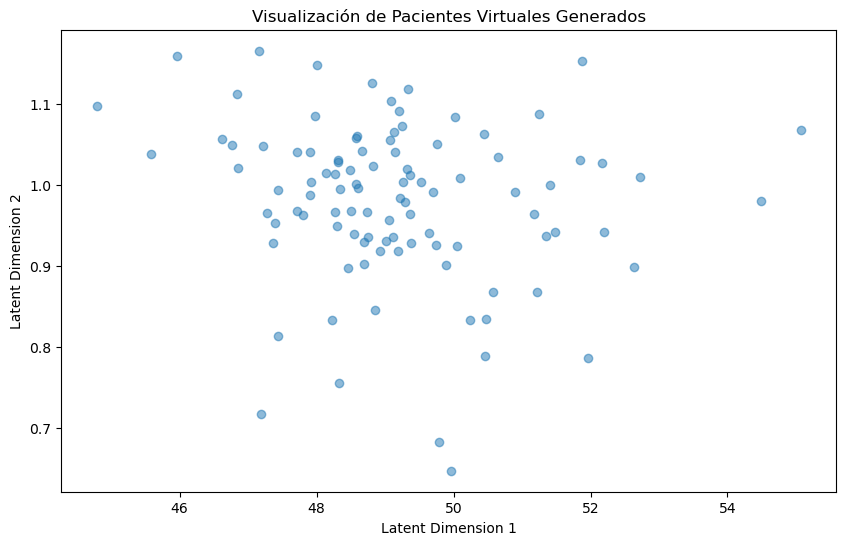

In [59]:
 ##Beno

import torch
from torch import Tensor
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#X = df_combined.values

# Parámetros
input_size = X.shape[1]
latent_size = 5  # Tamaño del espacio latente
batch_size = 64
epochs = 150

class VAE(nn.Module):
    def __init__(self, input_size, latent_size):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5),
            nn.Linear(64, latent_size*2)  
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5),
            nn.Linear(256, input_size),
        )

        # Trackers de pérdida
        self.total_loss_tracker = []
        self.reconstruction_loss_tracker = []
        self.kl_loss_tracker = []

    def forward(self, x):
        # Encoder
        z_mean_log_var = self.encoder(x)
        z_mean, z_log_var = torch.chunk(z_mean_log_var, 2, dim=1)

        # Reparametrización
        epsilon = torch.randn_like(z_mean)
        z = z_mean + torch.exp(0.5 * z_log_var) * epsilon

        # Decoder
        reconstruction = self.decoder(z)

        return z_mean, z_log_var, z, reconstruction

# Instanciar el modelo VAE y el optimizador
vae = VAE(input_size, latent_size)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Crear conjuntos de datos y dataloaders
train_dataset = TensorDataset(X_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Función de pérdida y entrenamiento
criterion = nn.MSELoss()
#criterion = nn.BCEWithLogitsLoss()

def train_step(model, data, optimizer):
    model.train()
    optimizer.zero_grad()

    data = data.squeeze(dim=1)
        
    z_mean, z_log_var, z, reconstruction = model(data)

    # Pérdida de reconstrucción usando error cuadrático medio
    reconstruction_loss = criterion(reconstruction, data)

    # Pérdida KL
    kl_loss = -0.5 * torch.sum(1 + z_log_var - z_mean.pow(2) - z_log_var.exp())

    # Pérdida total
    total_loss = reconstruction_loss + kl_loss

    total_loss.backward()
    optimizer.step()

    return total_loss.item(), reconstruction_loss.item(), kl_loss.item()

 #Entrenamiento bueno
for epoch in range(epochs):
    for batch in train_dataloader:
        data = batch[0]
        loss, reconstruction_loss, kl_loss = train_step(vae, data, optimizer)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Reconstruction Loss: {reconstruction_loss:.4f}, KL Loss: {kl_loss:.4f}')


vae.eval()
with torch.no_grad():
    # Muestreo aleatorio desde el espacio latente
    latent_samples = torch.randn(100, latent_size)
    generated_data = vae.decoder(latent_samples).numpy()

    generated_data = scaler.inverse_transform(generated_data)


# Crear DataFrame con datos generados
generated_df = pd.DataFrame(data=generated_data, columns=df_combined.columns)  
print("Pacientes virtuales generados:")
print(generated_df.head(10))

# Visualización de pacientes virtuales generados
plt.figure(figsize=(10, 6))
plt.scatter(generated_data[:, 0], generated_data[:, 1], alpha=0.5)
plt.title('Visualización de Pacientes Virtuales Generados')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()


Epoch 10/100, Loss: 1.2576
Epoch 20/100, Loss: 1.0719
Epoch 30/100, Loss: 0.4518
Epoch 40/100, Loss: 0.7041
Epoch 50/100, Loss: 0.4246
Epoch 60/100, Loss: 0.3732
Epoch 70/100, Loss: 0.3941
Epoch 80/100, Loss: 0.2118
Epoch 90/100, Loss: 0.4505
Epoch 100/100, Loss: 0.2080
Pacientes virtuales generados:
        age  menopause  tumor-size  inv-nodes  node-caps  deg-malig    breast  \
0  0.516771   0.533949    0.513690   0.007102   0.159528   0.562004  0.448830   
1  0.515307   0.501279    0.547806   0.009316   0.149611   0.569059  0.459843   
2  0.511789   0.512478    0.545457   0.050066   0.278477   0.568907  0.504375   
3  0.549241   0.481410    0.541632   0.021367   0.225147   0.512871  0.434730   
4  0.564293   0.490052    0.542231   0.013796   0.186545   0.551261  0.429309   
5  0.528188   0.500539    0.530605   0.023280   0.209117   0.571038  0.485476   
6  0.499990   0.533850    0.524141   0.021528   0.258368   0.548367  0.381683   
7  0.546395   0.528351    0.537780   0.026211   0.

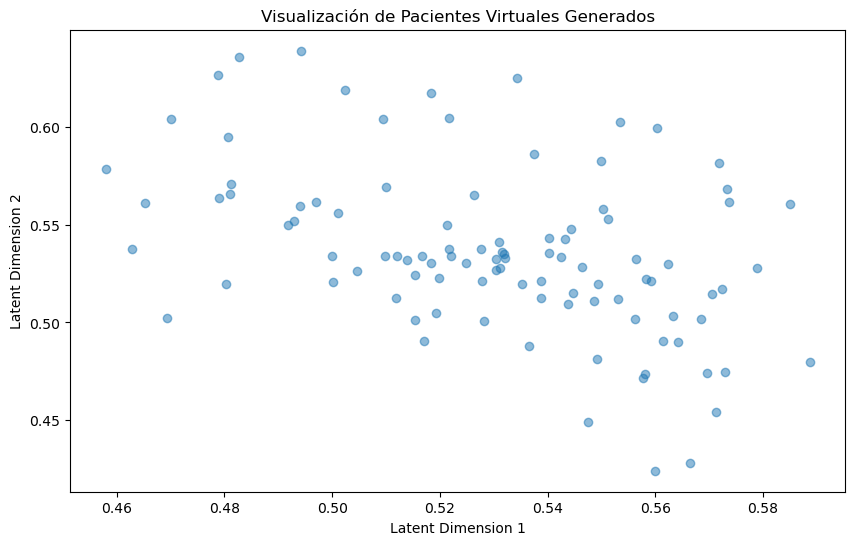

In [63]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Definir el VAE
class VAE(nn.Module):
    def __init__(self, input_size, latent_size):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256, track_running_stats=False),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128, track_running_stats=False),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64, track_running_stats=False),
            nn.Linear(64, latent_size*2)  # Salida con el doble de dimensiones para la media y la varianza
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64, track_running_stats=False),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128, track_running_stats=False),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256, track_running_stats=False),
            nn.Linear(256, input_size),
            nn.Sigmoid()  # Función de activación sigmoid para asegurar que la salida esté en [0, 1]
        )

    def forward(self, x):
        z_mean_log_var = self.encoder(x)
        z_mean, z_log_var = torch.chunk(z_mean_log_var, 2, dim=1)

        epsilon = torch.randn_like(z_mean)
        z = z_mean + torch.exp(0.5 * z_log_var) * epsilon

        reconstruction = self.decoder(z)

        return z_mean, z_log_var, z, reconstruction

# Aumentar el conjunto de datos X_train (aquí se usa un simple duplicado, ajusta según tu necesidad)
augmented_X_train = torch.cat([X_train, X_train])

# Parámetros
input_size = 9
latent_size = 5
batch_size = 64
epochs = 100
learning_rate = 1e-3

# Crear DataLoader para el conjunto de datos aumentado
train_dataset = TensorDataset(augmented_X_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Instanciar el modelo VAE y el optimizador
vae = VAE(input_size, latent_size)
optimizer = torch.optim.Adam(vae.parameters(), lr=learning_rate)

# Función de pérdida
criterion = nn.MSELoss()

# Entrenamiento del modelo
vae.train()
for epoch in range(epochs):
    for batch in train_dataloader:
        data = batch[0]
        optimizer.zero_grad()
        
        z_mean, z_log_var, z, reconstruction = vae(data)

        # Pérdida de reconstrucción usando error cuadrático medio
        reconstruction_loss = criterion(reconstruction, data)

        # Pérdida KL
        kl_loss = -0.5 * torch.sum(1 + z_log_var - z_mean.pow(2) - z_log_var.exp())

        # Pérdida total
        total_loss = reconstruction_loss + kl_loss

        total_loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss.item():.4f}')

# Modo evaluación después del entrenamiento
vae.eval()

# Ejemplo de generación de datos
with torch.no_grad():
    latent_samples = torch.randn(100, latent_size)
    generated_data = vae.decoder(latent_samples)

# Visualizar o utilizar los datos generados según sea necesario
    # Crear DataFrame con datos generados
generated_df = pd.DataFrame(data=generated_data, columns=df_combined.columns)  
print("Pacientes virtuales generados:")
print(generated_df.head(10))

# Visualización de pacientes virtuales generados
plt.figure(figsize=(10, 6))
plt.scatter(generated_data[:, 0], generated_data[:, 1], alpha=0.5)
plt.title('Visualización de Pacientes Virtuales Generados')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()


Epoch 10/100, Loss: 1.6605, Reconstruction Loss: 0.1495, KL Loss: 1.5110
Epoch 20/100, Loss: 0.5825, Reconstruction Loss: 0.1334, KL Loss: 0.4491
Epoch 30/100, Loss: 0.3815, Reconstruction Loss: 0.1164, KL Loss: 0.2651
Epoch 40/100, Loss: 0.4070, Reconstruction Loss: 0.1513, KL Loss: 0.2557
Epoch 50/100, Loss: 0.3312, Reconstruction Loss: 0.1140, KL Loss: 0.2172
Epoch 60/100, Loss: 0.2954, Reconstruction Loss: 0.1249, KL Loss: 0.1705
Epoch 70/100, Loss: 0.2779, Reconstruction Loss: 0.1240, KL Loss: 0.1538
Epoch 80/100, Loss: 0.5009, Reconstruction Loss: 0.1300, KL Loss: 0.3709
Epoch 90/100, Loss: 0.6591, Reconstruction Loss: 0.0908, KL Loss: 0.5683
Epoch 100/100, Loss: 0.1871, Reconstruction Loss: 0.1101, KL Loss: 0.0770
Pacientes virtuales generados:
        age  menopause  tumor-size  inv-nodes  node-caps  deg-malig    breast  \
0  0.526838   0.505075    0.562302   0.019775   0.190399   0.553001  0.440813   
1  0.538653   0.524277    0.535185   0.030323   0.214439   0.553395  0.46970

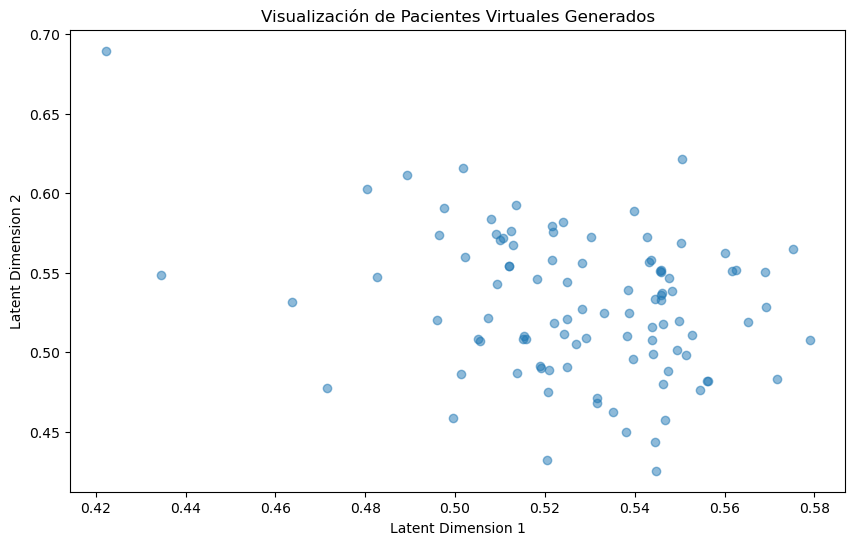

In [67]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# Definir el VAE
class VAE(nn.Module):
    def __init__(self, input_size, latent_size):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Linear(64, latent_size*2)  # Salida con el doble de dimensiones para la media y la varianza
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128, input_size),
            nn.Sigmoid()  # Función de activación sigmoid para asegurar que la salida esté en [0, 1]
        )

    def forward(self, x):
        z_mean_log_var = self.encoder(x)
        z_mean, z_log_var = torch.chunk(z_mean_log_var, 2, dim=1)

        epsilon = torch.randn_like(z_mean)
        z = z_mean + torch.exp(0.5 * z_log_var) * epsilon

        reconstruction = self.decoder(z)

        return z_mean, z_log_var, z, reconstruction

# Función de pérdida VAE
def vae_loss(reconstruction, data, z_mean, z_log_var):
    # Pérdida de reconstrucción usando error cuadrático medio
    reconstruction_loss = nn.MSELoss()(reconstruction, data)

    # Pérdida KL
    kl_loss = -0.5 * torch.sum(1 + z_log_var - z_mean.pow(2) - z_log_var.exp())

    # Pérdida total
    total_loss = reconstruction_loss + kl_loss

    return total_loss, reconstruction_loss, kl_loss

# Entrenamiento del modelo VAE
def train_vae(model, dataloader, optimizer, num_epochs=100):
    model.train()
    
    for epoch in range(num_epochs):
        for batch in dataloader:
            data = batch[0]
            optimizer.zero_grad()
            
            z_mean, z_log_var, z, reconstruction = model(data)

            # Calcular la pérdida VAE
            total_loss, reconstruction_loss, kl_loss = vae_loss(reconstruction, data, z_mean, z_log_var)

            total_loss.backward()
            optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss.item():.4f}, Reconstruction Loss: {reconstruction_loss.item():.4f}, KL Loss: {kl_loss.item():.4f}')

# Ejemplo de uso
input_size = 9
latent_size = 5
batch_size = 64
learning_rate = 1e-3
num_epochs = 100

# Crear DataLoader para el conjunto de datos aumentado
train_dataset = TensorDataset(augmented_X_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Instanciar el modelo VAE y el optimizador
vae = VAE(input_size, latent_size)
optimizer = optim.Adam(vae.parameters(), lr=learning_rate)

# Entrenar el modelo VAE
train_vae(vae, train_dataloader, optimizer, num_epochs=num_epochs)

# Modo evaluación después del entrenamiento
vae.eval()

# Ejemplo de generación de datos
with torch.no_grad():
    latent_samples = torch.randn(100, latent_size)
    generated_data = vae.decoder(latent_samples)

# Visualizar o utilizar los datos generados según sea necesario


# Crear DataFrame con datos generados
generated_df = pd.DataFrame(data=generated_data, columns=df_combined.columns)  
print("Pacientes virtuales generados:")
print(generated_df.head(10))

# Visualización de pacientes virtuales generados
plt.figure(figsize=(10, 6))
plt.scatter(generated_data[:, 0], generated_data[:, 1], alpha=0.5)
plt.title('Visualización de Pacientes Virtuales Generados')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

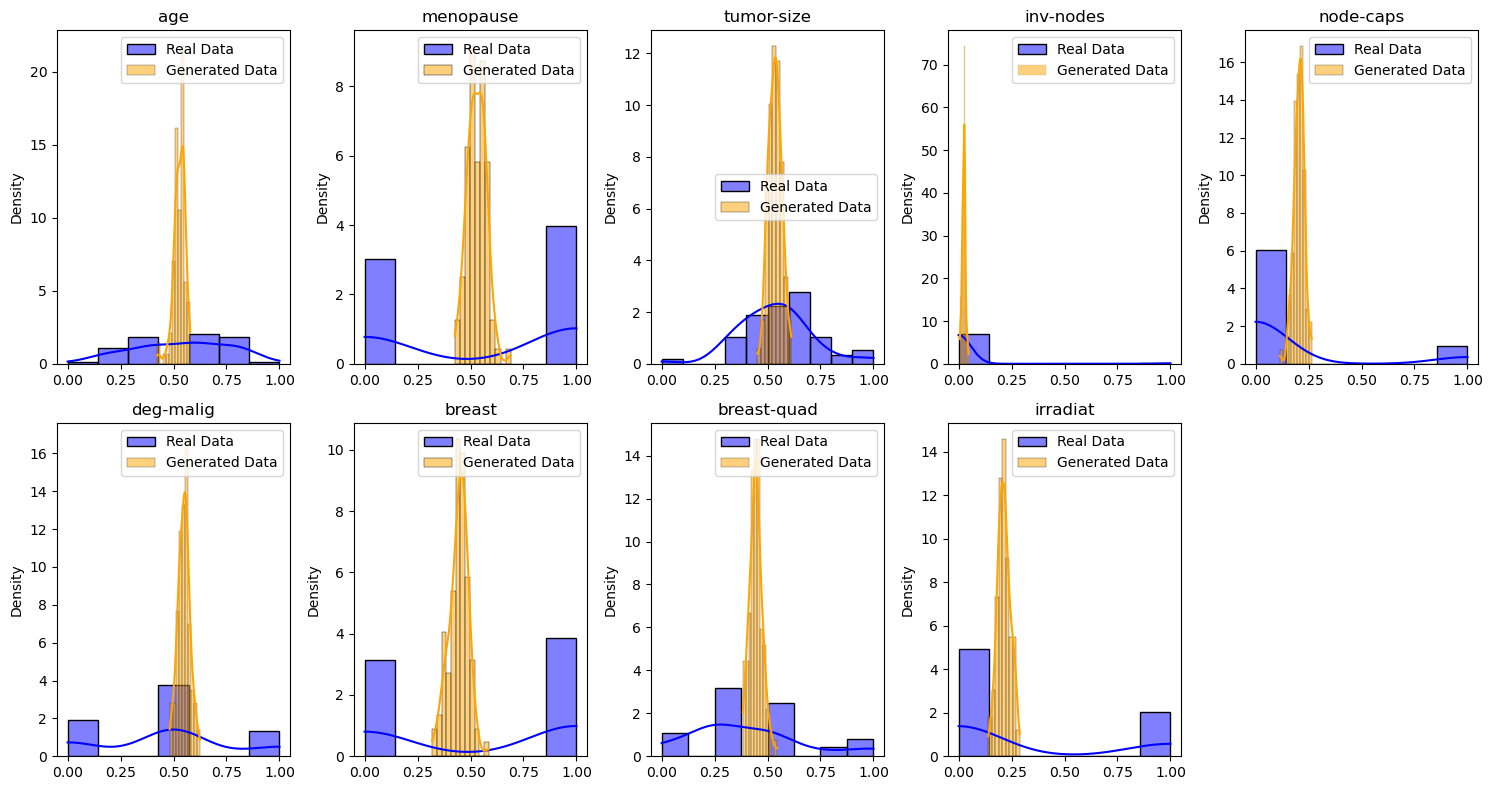

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [68]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  

# Función para comparar distribuciones marginales
def compare_marginal_distributions(real_data, generated_data, feature_names):
    # Crear subgráficos para cada covariable
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
    
    # Iterar sobre las covariables
    for i, ax in enumerate(axes.flatten()):
        # Verificar si hay más covariables a mostrar
        if i < len(feature_names):
            # Visualizar histogramas y densidades para pacientes reales y virtuales
            sns.histplot(real_data[:, i], kde=True, color='blue', ax=ax, label='Real Data', stat='density')
            sns.histplot(generated_data[:, i], kde=True, color='orange', ax=ax, label='Generated Data', stat='density')
            ax.set_title(feature_names[i])  # Establecer el título de la covariable
            ax.legend()  # Mostrar leyenda

        else:
            # Si no hay más covariables, desactivar los subgráficos restantes
            ax.axis('off')

    plt.tight_layout()  # Ajustar diseño
    plt.show()  # Mostrar gráficos

# Función para validar usando un clasificador
def validate_with_classifier(real_data, generated_data):
    # Combina los datos reales y virtuales
    X = np.vstack([real_data, generated_data])
    
    # Etiquetas para clasificación (1 para real, 0 para virtual)
    y = np.concatenate([np.ones(len(real_data)), np.zeros(len(generated_data))])

    # Entrenar un clasificador (Random Forest en este caso)
    classifier = RandomForestClassifier(n_estimators=50, random_state=42)
    classifier.fit(X, y)

    # Hacer predicciones y calcular métricas
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred)

    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:\n', report)

# Función para validar usando un clasificador con distribución conjunta
def validate_with_joint_distribution(real_data, generated_data):
    # Etiquetas para clasificación (1 para real, 0 para virtual)
    y_real = np.ones(len(real_data))
    y_generated = np.zeros(len(generated_data))

    # Combinar datos reales y virtuales
    X = np.vstack([real_data, generated_data])
    y = np.concatenate([y_real, y_generated])

    # Entrenar un clasificador (Random Forest en este caso)
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X, y)

    # Hacer predicciones y calcular métricas
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred)

    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:\n', report)

# Validar distribuciones marginales
compare_marginal_distributions(X_val.numpy(), generated_df.values, generated_df.columns)
plt.show()  # Mostrar gráficos de distribuciones marginales

# Validar usando un clasificador
validate_with_classifier(X_val.numpy(), generated_df.values)

# Validar con distribución conjunta
validate_with_joint_distribution(X_val.numpy(), generated_df.values)


In [48]:
# Comparación de estadísticas descriptivas
real_stats = pd.DataFrame(df_combined.describe())
generated_stats = pd.DataFrame(generated_df.describe())

# Imprimir las estadísticas descriptivas
print("Estadísticas Descriptivas para Pacientes Reales:")
print(real_stats)

print("\nEstadísticas Descriptivas para Pacientes Virtuales:")
print(generated_stats)


Estadísticas Descriptivas para Pacientes Reales:
              age   menopause  tumor-size   inv-nodes   node-caps   deg-malig  \
count  286.000000  286.000000  286.000000  286.000000  286.000000  286.000000   
mean     0.532867    0.536713    0.534266    0.016608    0.195804    0.524476   
std      0.202364    0.493340    0.182614    0.107031    0.397514    0.369108   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.400000    0.000000    0.400000    0.000000    0.000000    0.500000   
50%      0.600000    1.000000    0.600000    0.000000    0.000000    0.500000   
75%      0.600000    1.000000    0.600000    0.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           breast  breast-quad    irradiat  
count  286.000000   286.000000  286.000000  
mean     0.468531     0.444930    0.237762  
std      0.499883     0.271901    0.426459  
min      0.000000     0.000000    0.00000


Prueba de Mann-Whitney para age:
Estadística de la prueba U: 3300.0
Valor p: 0.14891870148365305
Resultado: No hay diferencia significativa entre las distribuciones.


Prueba de Mann-Whitney para menopause:
Estadística de la prueba U: 3300.0
Valor p: 0.14688994631015356
Resultado: No hay diferencia significativa entre las distribuciones.


Prueba de Mann-Whitney para tumor-size:
Estadística de la prueba U: 2808.0
Valor p: 0.7410972281499053
Resultado: No hay diferencia significativa entre las distribuciones.


Prueba de Mann-Whitney para inv-nodes:
Estadística de la prueba U: 100.0
Valor p: 4.444641763330617e-25
Resultado: Diferencia significativa entre las distribuciones.


Prueba de Mann-Whitney para node-caps:
Estadística de la prueba U: 800.0
Valor p: 1.394598739484956e-14
Resultado: Diferencia significativa entre las distribuciones.


Prueba de Mann-Whitney para deg-malig:
Estadística de la prueba U: 1255.0
Valor p: 2.5414883402366933e-09
Resultado: Diferencia significativa entre

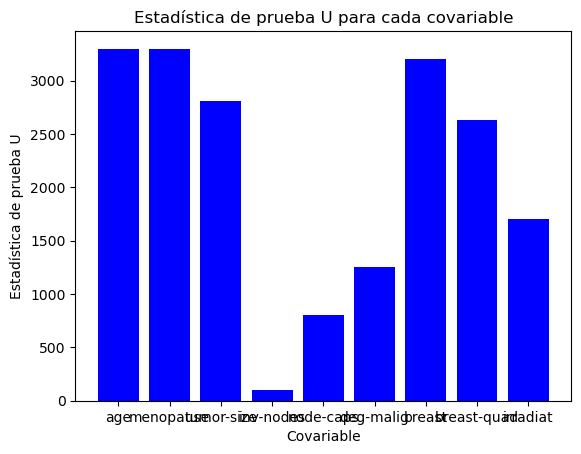

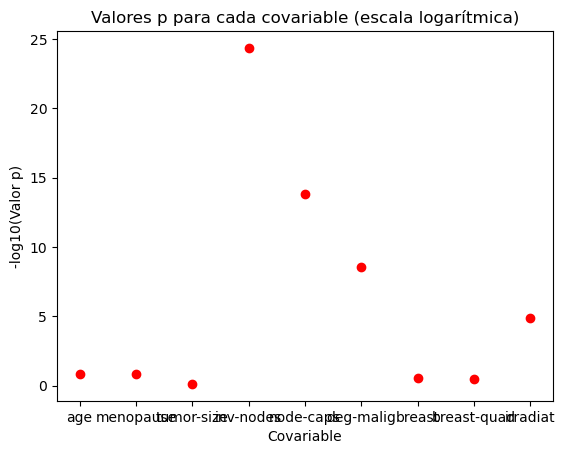

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Función para realizar la prueba de Mann-Whitney para cada covariable
def compare_distributions_mann_whitney(real_data, generated_data, feature_names):

    u_statistics = []    
    p_values = []

    for i, feature in enumerate(feature_names):
        # Aplicar la prueba de Mann-Whitney para la covariable actual
        stat, p_value = mannwhitneyu(real_data[:, i], generated_data[:, i], alternative='two-sided')
        
        u_statistics.append(stat)
        p_values.append(p_value) 

        # Imprimir resultados
        print(f'\nPrueba de Mann-Whitney para {feature}:')
        print(f'Estadística de la prueba U: {stat}')
        print(f'Valor p: {p_value}')

        # Interpretación del valor p
        if p_value < 0.05:
            print('Resultado: Diferencia significativa entre las distribuciones.\n')
        else:
            print('Resultado: No hay diferencia significativa entre las distribuciones.\n')

# Visualizar la estadística de prueba U
    plt.bar(feature_names, u_statistics, color='blue')
    plt.xlabel('Covariable')
    plt.ylabel('Estadística de prueba U')
    plt.title('Estadística de prueba U para cada covariable')
    plt.show()

    # Visualizar los valores p
    plt.scatter(feature_names, -np.log10(p_values), color='red')
    plt.xlabel('Covariable')
    plt.ylabel('-log10(Valor p)')
    plt.title('Valores p para cada covariable (escala logarítmica)')
    plt.show()

# Comparar distribuciones usando la prueba de Mann-Whitney
compare_distributions_mann_whitney(X_val.numpy(), generated_df.values, generated_df.columns)


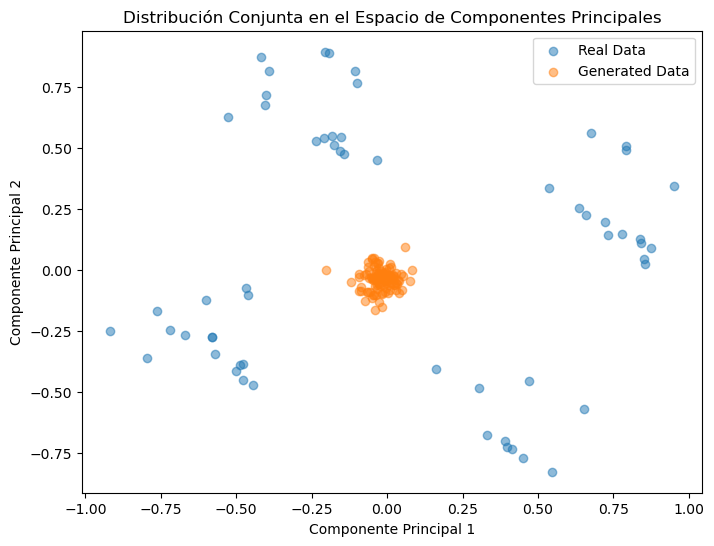

In [70]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Función para realizar PCA y visualizar la distribución conjunta en un espacio de menor dimensión
def visualize_pca(real_data, generated_data):
    # Convertir tensores a arrays de NumPy
    real_array = real_data.numpy()
    generated_array = generated_data.to_numpy()

    # Combinar datos reales y virtuales
    combined_data = np.vstack([real_array, generated_array])

    # Aplicar PCA
    pca = PCA(n_components=9)  # Elegir el número de componentes principales deseados
    principal_components = pca.fit_transform(combined_data)

    # Visualizar distribución conjunta en el espacio de componentes principales
    plt.figure(figsize=(8, 6))
    plt.scatter(principal_components[:len(real_array), 0], principal_components[:len(real_array), 1], label='Real Data', alpha=0.5)
    plt.scatter(principal_components[len(real_array):, 0], principal_components[len(real_array):, 1], label='Generated Data', alpha=0.5)
    plt.title('Distribución Conjunta en el Espacio de Componentes Principales')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.show()

# Aplicar PCA y visualizar distribución conjunta
visualize_pca(X_val, generated_df)
